# Requeriments

In [1]:
import numpy                 as np
import pandas                as pd
#import modin.pandas as pd
import matplotlib.pyplot     as plt
import seaborn               as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Uploading data (LittlePig)

In [2]:
df = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_full_ok.csv")
id_cli = df['id_registro']
df = df.drop(['id_registro'], axis=1)
df

,periodo,fecha_nacimiento,edad,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,mora_max,cant_moras_30_ult_12_meses,...,genero_tag,estado_civil,nivel_academico,profesion,ocupacion,ciudad_residencia,rep_calif_cred,genero,anho,mes
0,201908,19840630,35,20180526,1.0,10,1,1,0,0,...,2,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2019,8
1,201909,19840630,35,20180526,1.0,10,1,1,0,0,...,2,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2019,9
2,201907,19840630,35,20180526,1.0,10,1,1,0,0,...,2,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2019,7
3,201903,19840630,35,20180526,1.0,10,1,1,0,0,...,2,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2019,3
4,201911,19840630,35,20180526,1.0,10,1,1,0,0,...,2,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,202011,19740415,47,20201010,2.0,10,1,1,0,0,...,1,SOLTERO,UNIVERSITARIO,OTROS,Empleado,PUERRES,A,F,2020,11
9527189,202011,19850620,35,20201003,3.0,90,1,1,28,0,...,2,DIVORCIADO,UNIVERSITARIO,CARRERA MILITAR,Empleado,PEDRAZA,C,M,2020,11
9527190,202011,19740316,47,20200616,3.0,10,1,1,23,0,...,2,DIVORCIADO,UNIVERSITARIO,QUIMICA FARMACEUTICA,Independiente,MURILLO,D,M,2020,11
9527191,202011,19780722,42,20200423,2.0,10,1,1,0,0,...,1,CASADO,ESPECIALIZACION,ECONOMIA,Empleado,PUERRES,B,F,2020,11


In [3]:
X = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_Variables.csv")
list(X['Selected_variables'])

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'profesion',
 'nivel_academico',
 'ocupacion',
 'ocupacion_tag_gasto_familiar',
 'estado_civil',
 'rep_calif_cred',
 'genero',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'ciudad_residencia',
 'edad',
 'gasto_familiar']

In [4]:
df = df[list(X['Selected_variables'])]
df

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
0,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201908,0,0.0,8,903000.0,0.0,LORICA,35,2.325260e+05
1,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201909,0,0.0,9,903000.0,0.0,LORICA,35,2.659000e+05
2,1.0,1172612.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201907,0,0.0,7,903000.0,0.0,LORICA,35,2.430520e+05
3,1.0,1172612.0,1282673.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201903,0,0.0,3,2433000.0,0.0,LORICA,35,2.760140e+05
4,1.0,1355032.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,0,201911,0,0.0,11,0.0,0.0,LORICA,35,4.188660e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.0,2281362.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,202011,1,6000000.0,11,0.0,0.0,PUERRES,47,7.431714e+05
9527189,3.0,26913722.0,14956096.0,CARRERA MILITAR,UNIVERSITARIO,Empleado,6,DIVORCIADO,C,M,...,12,202011,1,71000000.0,11,99000.0,0.0,PEDRAZA,35,8.502165e+05
9527190,3.0,16301000.0,0.0,QUIMICA FARMACEUTICA,UNIVERSITARIO,Independiente,8,DIVORCIADO,D,M,...,17,202011,1,150800000.0,11,300000.0,0.0,MURILLO,47,7.853290e+05
9527191,2.0,14481371.0,11916465.0,ECONOMIA,ESPECIALIZACION,Empleado,6,CASADO,B,F,...,18,202011,1,26000000.0,11,184811000.0,0.0,PUERRES,42,1.029045e+06


In [5]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
#features_i = features[features['type'] == 'int64'].index
#features_b = features[features['type'] == 'bool'].index

In [6]:
features_f

Index(['categoria', 'ingreso_final', 'mediana_nom3',
       'estado_civil_tag_gasto_familiar', 'nivel_academico_tag_gasto_familiar',
       'cupo_total_tc', 'saldo_no_rot_mdo', 'mediana_pen3', 'gasto_familiar'],
      dtype='object')

In [7]:
df[features_o].describe(include='all').T

,count,unique,top,freq
profesion,9527193,79,OTROS,3561488
nivel_academico,9527193,6,UNIVERSITARIO,5755845
ocupacion,9527193,10,Empleado,7158608
estado_civil,9527193,5,SOLTERO,4609348
rep_calif_cred,9527193,8,A,2693172
genero,9527193,2,F,4941539
ciudad_residencia,9527193,803,PEDRAZA,2634338


# One-Hot Encoding

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df, df, test_size=0.80)
df = X_train
df

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
7803573,1.0,835000.0,0.0,TRABAJO SOCIAL,TECNOLOGO,Jubilado,2,SOLTERO,A,F,...,4,202003,0,0.0,3,6458000.0,0.0,GUADALAJARA DE BUGA,60,109400.00
2671270,1.0,2875000.0,0.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,1,202007,0,0.0,7,0.0,0.0,PUERRES,58,262997.00
8354362,2.0,4416711.0,0.0,INGENIERIA ADMINISTRATIVA,ESPECIALIZACION,Empleado,6,SOLTERO,B,F,...,1,202011,0,0.0,11,71000.0,0.0,PUERRES,36,800997.00
8007124,1.0,1697334.0,0.0,OTROS,TECNOLOGO,Empleado,6,CASADO,C,F,...,2,202004,1,6000000.0,4,0.0,0.0,PUERRES,53,0.00
7283933,1.0,2754000.0,2392000.0,COMERCIO INTERNACIONAL,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,201905,1,6200000.0,5,55000.0,0.0,RIOSUCIO,33,156700.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4676323,3.0,5689470.0,5409770.0,INGENIERIA DE SISTEMAS,UNIVERSITARIO,Empleado,6,CASADO,A,M,...,4,202003,1,10200000.0,3,0.0,0.0,NARINO,41,565070.00
758049,4.0,8465806.0,0.0,DERECHO,BACHILLER,Independiente,8,CASADO,E,F,...,1,202007,1,14000000.0,7,0.0,0.0,PEDRAZA,26,4417786.00
5569669,1.0,2637937.0,2587937.0,NUTRICION Y DIETETICA,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,1,201905,0,0.0,5,3187000.0,0.0,PUERRES,59,325915.00
7949444,3.0,5482456.0,15380573.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,G,M,...,4,201902,1,20000000.0,2,119000.0,0.0,NARINO,34,674644.00


In [9]:
df_onehot = pd.get_dummies(df, columns=features_o)
list(df_onehot.columns)

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'edad',
 'gasto_familiar',
 'profesion_ADMINISTRACION',
 'profesion_AGRONOMIA',
 'profesion_ARQUITECTURA',
 'profesion_ARTES',
 'profesion_AUXILIAR CONTABLE',
 'profesion_AUXILIAR DE ENFERMERIA',
 'profesion_AUXILIAR DE ODONTOLOGIA',
 'profesion_AZAFATA',
 'profesion_BACTERIOLOGIA',
 'profesion_BIOLOGIA',
 'profesion_CARRERA MILITAR',
 'profesion_COMERCIO INTERNACIONAL',
 'profesion_COMUNICACION SOCIAL',
 'profesion_CONSTRUCCION CIVIL',
 'profesion_CONTADURIA',
 'profesion_DECORADORES Y DISEÑADORES COMERCIALES',
 'pro

In [10]:
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,nivel_academico_tag_gasto_familiar,...,ciudad_residencia_YAMUESQUER,ciudad_residencia_YARIMA,ciudad_residencia_YONDO,ciudad_residencia_ZAMBRANO,ciudad_residencia_ZAPATOCA,ciudad_residencia_ZARAGOZA,ciudad_residencia_ZARZAL,ciudad_residencia_ZIPACON,ciudad_residencia_ZONA BANANERA,ciudad_residencia_ZU#IGA
7803573,1.0,835000.0,0.0,2,1,1,8,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2671270,1.0,2875000.0,0.0,6,1,1,8,1,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
8354362,2.0,4416711.0,0.0,6,1,1,7,1,1.0,5.0,...,0,0,0,0,0,0,0,0,0,0
8007124,1.0,1697334.0,0.0,6,1,1,5,1,5.0,1.0,...,0,0,0,0,0,0,0,0,0,0
7283933,1.0,2754000.0,2392000.0,6,1,1,8,1,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4676323,3.0,5689470.0,5409770.0,6,1,1,8,2,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
758049,4.0,8465806.0,0.0,8,1,1,4,1,5.0,4.0,...,0,0,0,0,0,0,0,0,0,0
5569669,1.0,2637937.0,2587937.0,6,1,1,8,1,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
7949444,3.0,5482456.0,15380573.0,6,1,1,2,2,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_onehot.shape

(1905438, 895)

# PCA - _Principal Component Analysis_

## Centered

In [12]:
Estandar = StandardScaler(with_std=False)
Estandar.fit(df_onehot)

df_std = Estandar.transform(df_onehot)
df_std = pd.DataFrame(df_std)

#df_std = pd.DataFrame()
#for i in df_onehot.columns:
#    df_std[i] = df_onehot[i]-np.mean(df_onehot[i])

round(df_std.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
0,1905438.0,-0.0,0.67,-1.49,-0.49,-0.49,0.51,3.510000e+00
1,1905438.0,0.0,7772319.53,-4792370.84,-2891370.84,-1677370.84,507629.16,3.938531e+09
2,1905438.0,0.0,2880307.34,-1432979.96,-1432979.96,-1432979.96,696200.79,2.469295e+08
3,1905438.0,0.0,1.57,-4.80,0.20,0.20,0.20,4.200000e+00
4,1905438.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000000e+00
...,...,...,...,...,...,...,...,...
890,1905438.0,-0.0,0.01,-0.00,-0.00,-0.00,-0.00,1.000000e+00
891,1905438.0,0.0,0.01,-0.00,-0.00,-0.00,-0.00,1.000000e+00
892,1905438.0,-0.0,0.00,-0.00,-0.00,-0.00,-0.00,1.000000e+00
893,1905438.0,-0.0,0.00,-0.00,-0.00,-0.00,-0.00,1.000000e+00


In [13]:
autovalores, autovectores = np.linalg.eig(df_std.T.dot(df_std))

In [14]:
PCA = pd.DataFrame(columns = ['Variable','Autovalor'])
PCA['Variable'] = df_onehot.columns
PCA['Autovalor'] = autovalores.real
PCA = PCA.sort_values(by=('Autovalor'), ascending=False, ignore_index = True)
PCA['Participacion'] = PCA['Autovalor']/PCA['Autovalor'].sum()*100
PCA['Acumulado'] = PCA['Participacion'].cumsum()
PCA.head(50)

,Variable,Autovalor,Participacion,Acumulado
0,categoria,2.001054e+22,9.774385e+01,97.743850
1,ingreso_final,3.435853e+20,1.678283e+00,99.422133
2,mediana_nom3,9.727260e+19,4.751396e-01,99.897273
3,ocupacion_tag_gasto_familiar,1.500734e+19,7.330512e-02,99.970578
4,cartera_castigada,3.865637e+18,1.888216e-02,99.989460
5,ind_mora_vigente,2.157282e+18,1.053750e-02,99.999998
6,rep_calif_cred_tag_gasto_familiar,5.113575e+14,2.497786e-06,100.000000
7,genero_tag,4.291293e+09,2.096133e-11,100.000000
8,estado_civil_tag_gasto_familiar,5.054226e+08,2.468797e-12,100.000000
9,nivel_academico_tag_gasto_familiar,2.652552e+08,1.295671e-12,100.000000


Text(0.5, 1.0, 'Componentes Principales Alomarrano')

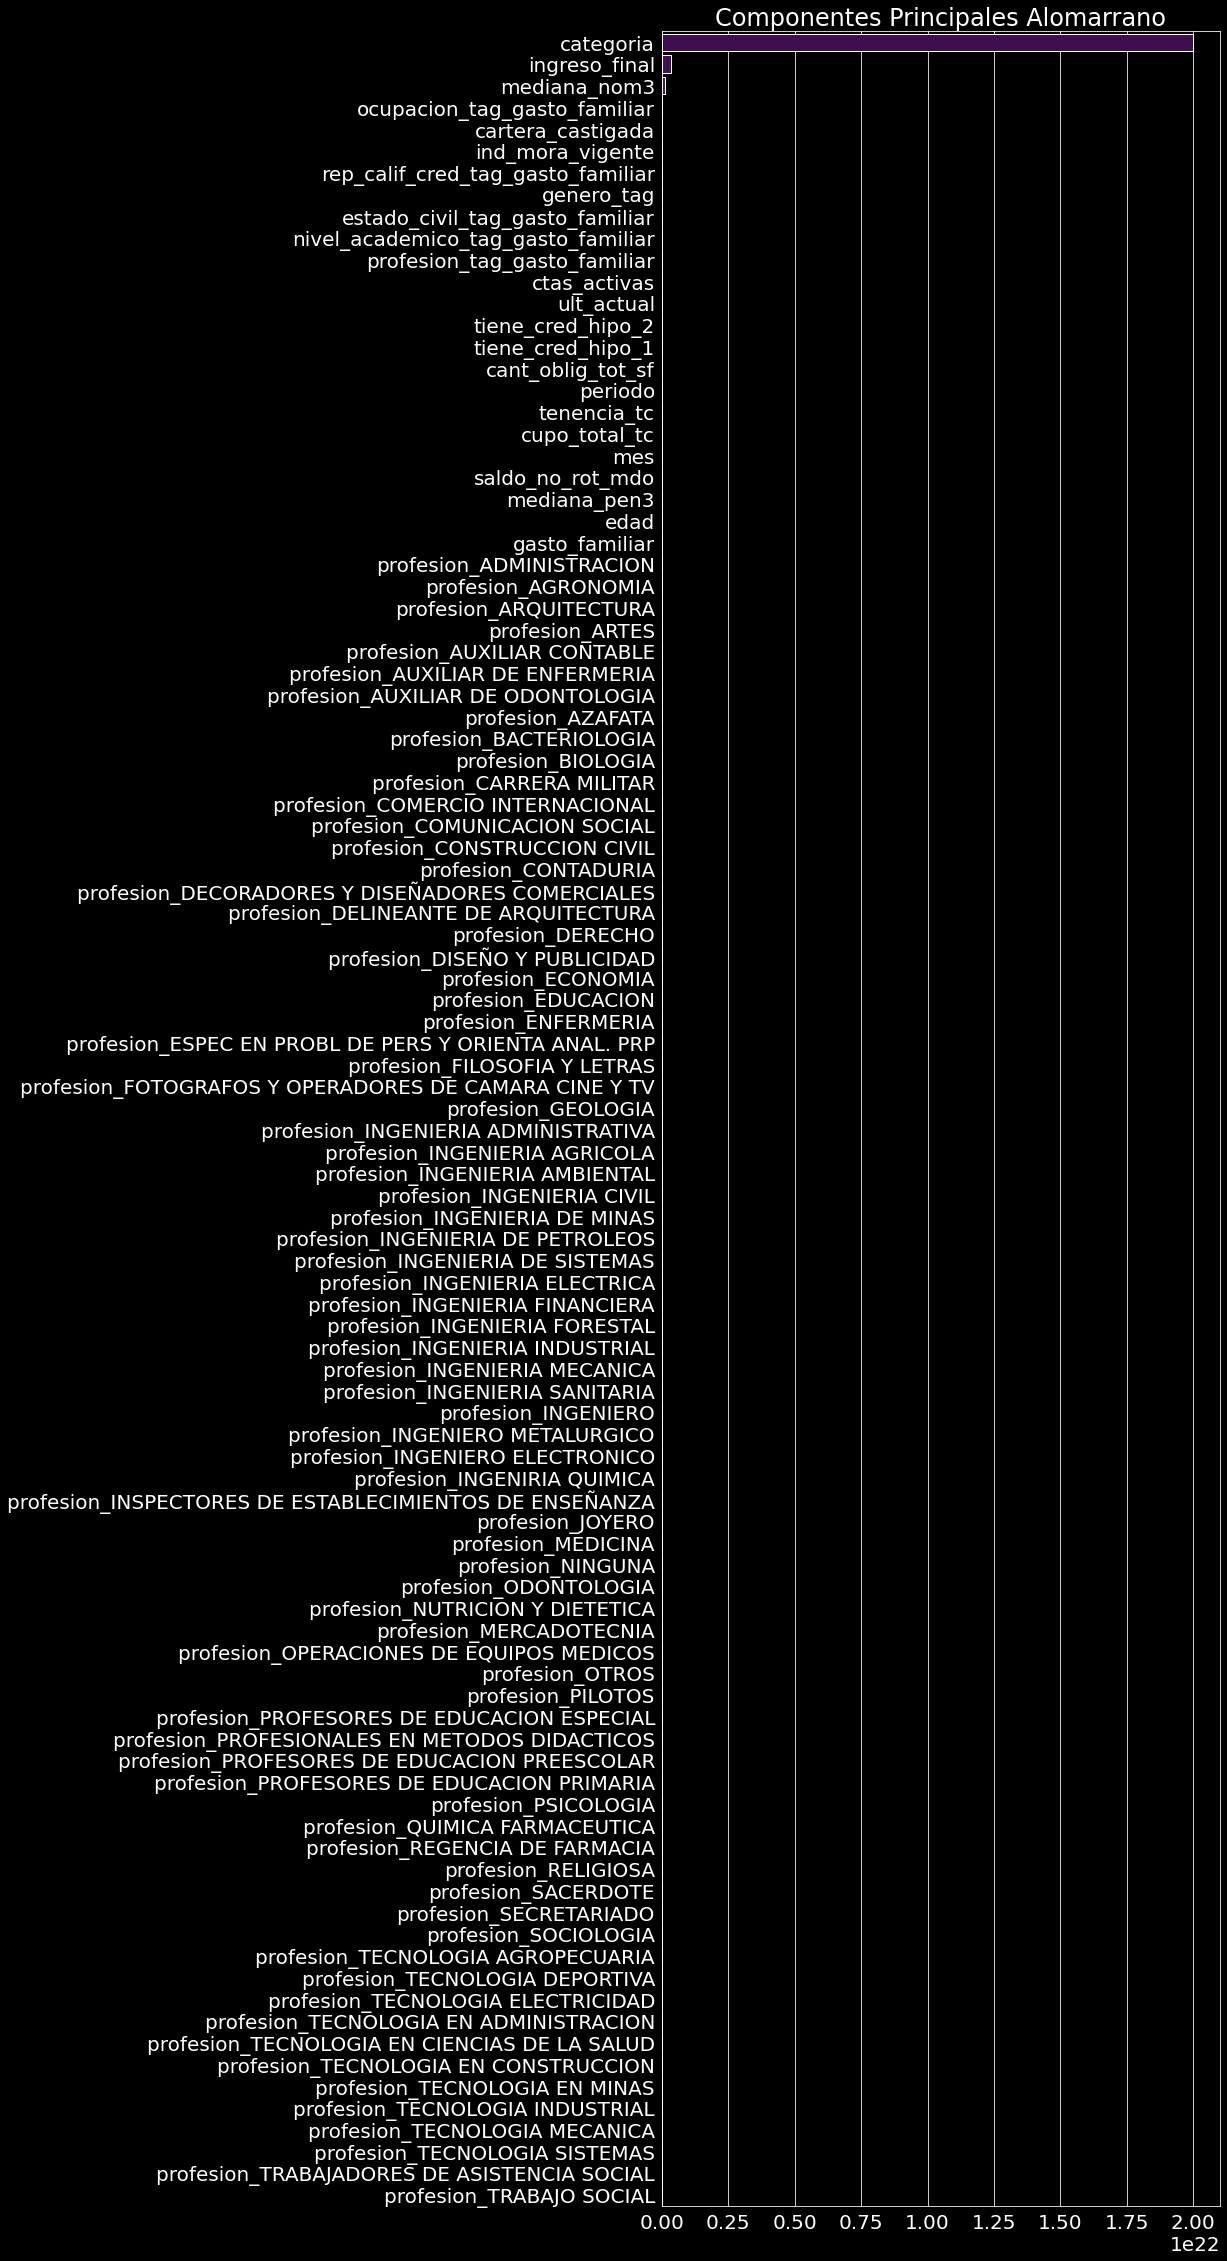

In [15]:
plt.rcParams.update({'font.size': 20})
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.figure(figsize=(10,40))
y = np.array(list(PCA['Variable'].head(100)))
x = np.array(list(PCA['Autovalor'].head(100)))
sns.barplot(x=x, y=y, palette="seagreen")
plt.title("Componentes Principales Alomarrano")

Text(0.5, 1.0, 'Componentes Principales Data Alomarrano')

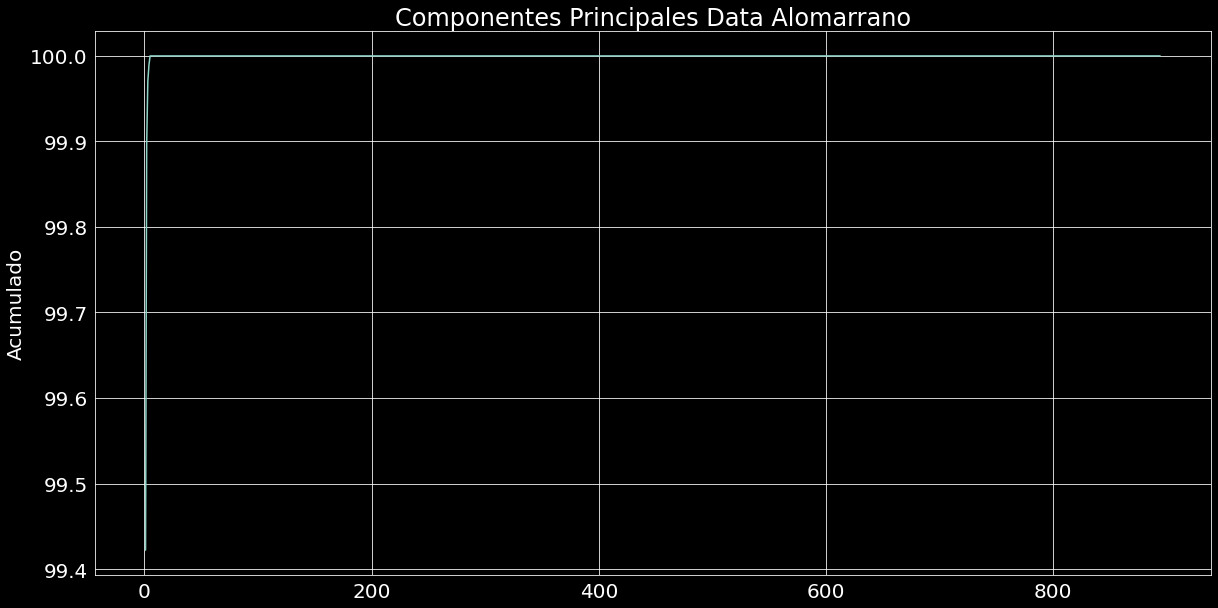

In [16]:
plt.rcParams.update({'font.size': 20})
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.figure(figsize=(20,10))
y = PCA.loc[1:PCA.shape[0],'Acumulado']
x = range(1,PCA.shape[0])
sns.lineplot(x=x, y=y, palette="69d")
plt.title("Componentes Principales Data Alomarrano")

In [17]:
PCA.to_csv("/mnt/workstation/data/Alomarrano/littlepig_PCAVariables_centred.csv", index=False)